In this notebook we will see how to aproximate persistent homology of a continuous function using cubical complex. 
For that, we will restrict ourself to $[-2,2] \times [-2,2]$ domain. On this domain, we create N by N grid of points
and, for each grid point, we compute its distance from the unit circle $x^2+y^2=1.$ Note that this distance from
a cycle for a point $(x,y)$ is $abs( norm(x^2-y^2)-1 ).$ This property is used in the computations below. 

In [1]:
import numpy as np
import math
import gudhi as gd
from matplotlib import pyplot as plt  
%matplotlib inline

In [2]:
#Here we create N by N grid
N = 100   
array = np.zeros((2*N+1,2*N+1))
xExtrem = 2;
yExtrem = 2;

bitmap = []
for i in range(0,2*N+1):
    for j in range (0,2*N+1):
        x = i/(2*float(N)+1)*2*float(xExtrem)-xExtrem
        y = j/(2*float(N)+1)*2*float(xExtrem)-xExtrem
        norm = math.sqrt( x*x + y*y )
        norm =  math.fabs(norm-1)
        array[i][j] = norm
        bitmap.append(norm)   

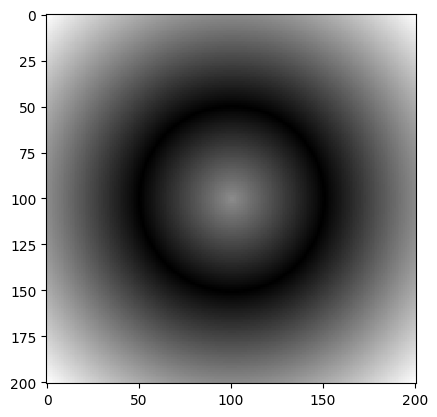

In [3]:
#Here we will display the image corresponding to the values of points in the grid:
plt.imshow(array, cmap='gray', interpolation='nearest', vmin=np.amin(array), vmax=np.amax(array))
plt.show()      

usetex mode requires TeX.


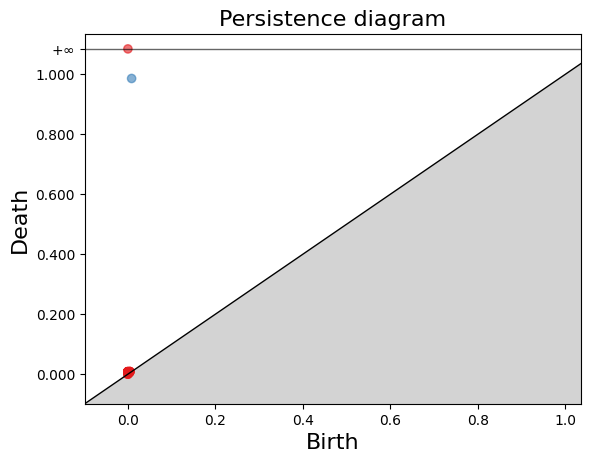

In [4]:
#Given the input data we can buld a Gudhi btmap cubical complex:
bcc = gd.CubicalComplex(top_dimensional_cells = bitmap, dimensions=[2*N+1,2*N+1])
persistence = bcc.persistence()
gd.plot_persistence_diagram(persistence) 
plt.show()